# Chapter 8 - Tree Based Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

import graphviz 

%matplotlib inline
plt.style.use('seaborn-white')

In [21]:
# so dot.exe is found
import os
os.environ["PATH"] += os.pathsep + 'C:\Anaconda3\Library\\bin\graphviz'

In [46]:
# This function creates images of tree models using pydot
def plot_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, 
                    feature_names=features, class_names=classn, 
                    filled=filled,
                    precision=2)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
    return Image(graph.create_png())

In [4]:
df = pd.read_csv('Data/Hitters.csv').dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,,,,,,,,
Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N


## 8.1 The Basics of Decision Trees

### 8.1.1 Regression Trees

In [109]:
X = df_hitters[['Years', 'Hits']]
y = np.log(df_hitters.Salary)

In [146]:
# we can also use the option max_leaf_nodes=3 alone
regressionTree = DecisionTreeRegressor(max_depth=2, min_impurity_decrease=0.05)
regressionTree = regressionTree.fit(X, y)

#### FIGURE 8.1

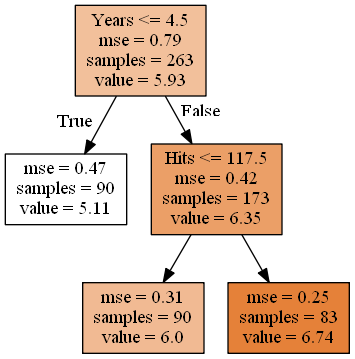

In [147]:
plot_tree(regressionTree, ['Years', 'Hits'])

#### FIGURE 8.2

In [154]:
lines = []
for node, feature in enumerate(regressionTree.tree_.feature):
    if feature != -2: # node
        lines.append((feature, regressionTree.tree_.threshold[node]))

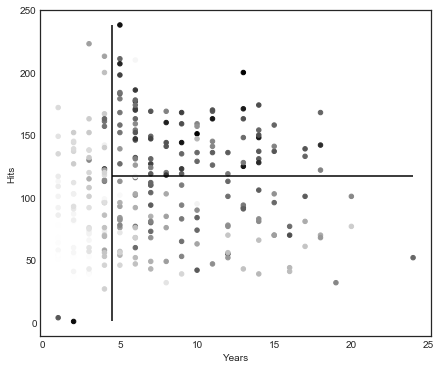

In [156]:
# the color indicates the value
ax = X.plot('Years', 'Hits', kind='scatter', color=y, figsize=(7,6))
# this algorithm doesn't really work for other cases...
last_threshold = None
for feature, threshold in lines:
    if feature == 0:
        if not last_threshold:
            ax.vlines(threshold, ymin=X.iloc[:,0].min(), ymax=X.iloc[:,1].max())
        else:
            ax.vlines(threshold, ymin=X.iloc[:,0].min(), ymax=last_threshold)
    else:
        if not last_threshold:
            ax.hlines(threshold, xmin=X.iloc[:,1].min(), xmax=X.iloc[:,0].max())
        else:
            ax.hlines(threshold, xmin=last_threshold, xmax=X.iloc[:,0].max())
    last_threshold = threshold

### 8.1.2 Classification Trees